## Observations and Insights 

In [300]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset - by Mouse ID left join due to studing the results
mouse_study_merge = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview - provides a table of both by Mouse ID
mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [301]:
# Checking the number of mice - gives 249 mice
len(mouse_study_merge["Mouse ID"].unique())


249

In [302]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = mouse_study_merge.loc[mouse_study_merge.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_id


array(['g989'], dtype=object)

In [303]:
# Optional: Get all the data for the duplicate mouse ID. -- need to look at this again
#dup_mice_id = mouse_study_merge.loc[mouse_study_merge["Mouse ID"] == "g898"]
#dup_mice_id

In [304]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study = mouse_study_merge[mouse_study_merge['Mouse ID'].isin(dup_mice_id)==False]
clean_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [305]:
# Checking the number of mice in the clean DataFrame.
len(clean_study["Mouse ID"].unique())

248

## Summary Statistics

In [306]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [307]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# sample from online - candidates_by_month = candidates_df.groupby('month').agg(num_cand_month = ('num_candidates', 'sum'))

tumor_values = clean_study.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

#tumor_volume = tumor_values['Tumor Volume (mm3)']
# mean,  
#tumor_mean = tumor_values(['Tumor Volume (mm3)']).mean()

#median, 
#tumor_median = (clean_study.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].median())

#variance, 
#tumor_var = (clean_study.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].var())

#standard deviation, and SEM of the tumor volume.
#tumor_std = (clean_study.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].std())

#mice_scipy = sts.mode(tumor_values['Tumor Volume (mm3)'])
#mice_scipy

#tumor_sem = (clean_study.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].sem())
#tumor_sem

# Assemble the resulting series into a single summary dataframe.
#tumor_summary_df =pd.DataFrame({"Tumor Mean" : [tumor_mean],
#                              "Tumor Median" : [tumor_median],
#                              "Tumor Variance":[tumor_var],
#                              "Tumor Standard Deviation" : [tumor_std],
#                              "Tumor Standar Error of Mean" : [tumor_sem]})

tumor_values

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

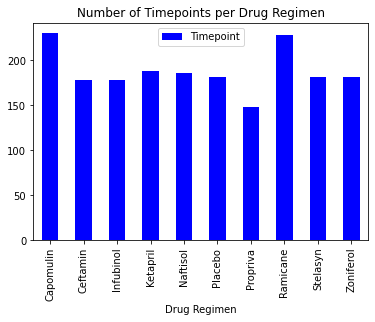

In [308]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#newgroupby with 'Timepoint' and  'Drug Regimen' #count the timepoints for each drug
 
timepoint_pandas = pd.DataFrame(clean_study.groupby(['Drug Regimen'])['Timepoint'].count())
timepoint_pandas


# Use DataFrame.plot() in order to create a bar chart of the data
timepoint_pandas = timepoint_pandas.plot(kind="bar", facecolor= "blue")

# Set a title for the chart
plt.title("Number of Timepoints per Drug Regimen")

plt.show()
#plt.tight_layout()

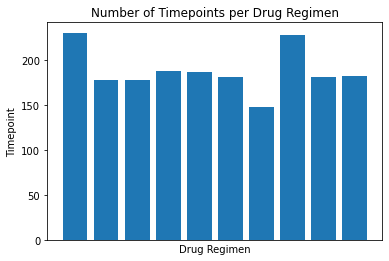

In [309]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#newgroupby with 'Timepoint' and  'Drug Regimen' #count the timepoints for each drug
 
timepoint_values = clean_study.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint_values

#plot in pyplt (df = groupby.plotbar())
#time_pyplt = timepoint_values.plot(kind="bar", facecolor= "blue")


#plt title "Number of Timepoints per Drug Regimen"
#plt.title("Number of Timepoints per Drug Regimen")
#timepoint_values

#data = [23,85, 72, 43, 52]
labels = clean_study.groupby(['Drug Regimen'])
plt.xticks(timepoint_values), labels
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.title("Number of Timepoints per Drug Regimen")
plt.bar(range(len(timepoint_values)), timepoint_values) 
plt.show()


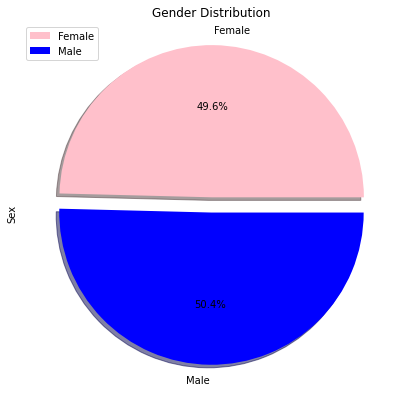

,Total Count
Sex,
Female,123
Male,125


In [310]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#genders to get the plot

mice_gender = clean_study.groupby(["Mouse ID","Sex"])
mice_gender

gender_df = pd.DataFrame(mice_gender.size())
gender_df

#create df for total counts - 123 female, 125 male
final_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
final_gender.columns = ["Total Count"]
final_gender

#colors
colors = ['pink', 'blue']

#create piechart based on values
explode = (0.1,0)
gender_pie = final_gender.plot.pie(y="Total Count", explode=explode, colors= colors,figsize=(12,7),shadow = True, autopct="%1.1f%%")
plt.title('Gender Distribution')
plt.ylabel('Sex')
plt.legend(loc="upper left")
plt.show()
final_gender

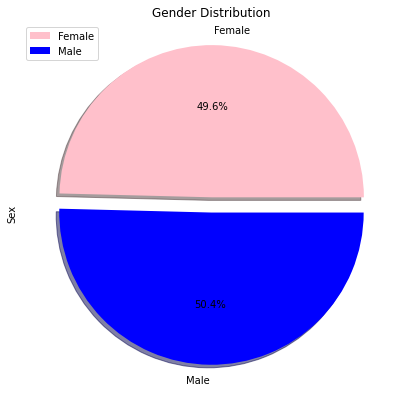

In [311]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot (fixed due to an array of arrays in data)
  #values and info     
data = pd.Series([final_gender.values[0][0],final_gender.values [1][0]])
labels = final_gender.index
colors = ['pink', 'blue']
explode = (0.1,0)

#plt the pie
fig = plt.figure(figsize=(12,7))
plt.pie(data, labels = labels, explode=explode, colors = colors, shadow = True, autopct='%1.1f%%')
plt.title('Gender Distribution')    
plt.ylabel('Sex')
plt.legend(loc="upper left")
plt.show()


## Quartiles, Outliers and Boxplots

In [319]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse ------ 248 rows
regimen_gb= pd.DataFrame(clean_study.groupby(["Mouse ID"])['Timepoint'].max())
regimen_gb.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint ---- shape = (248, 8)
regimen_gb_merge = regimen_gb.merge(clean_study, on=["Mouse ID","Timepoint"], how="left")
regimen_gb_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [330]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drug in treatment:
    tumor_vol = regimen_gb_merge.loc[regimen_gb_merge["Drug Regimen"] == drug,"Tumor Volume (mm3)"] 
    tumor_vol_list.append(tumor_vol)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes ---- hint do everything in the forloop
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64
6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64
0      67.973419
1      65.525743
11     57.031862
13     66.083066


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
